In [121]:
%matplotlib inline
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np
import random
from coolname import generate_slug as name

In [122]:
inputs = [name(2) for i in range(5)]
hidden = [name(2) for i in range(250)]
done = []
outputs = [name(2) for i in range(5)]
g = nx.DiGraph()

edges = []
    
for h in hidden:
    for _ in range(3):
        edges.append((random.choice(inputs+done),h,random.uniform(0,1)))
        
    for _ in range(1):
        edges.append((h,random.choice(outputs),random.uniform(0,1)))
        
    done.append(h)

g.add_weighted_edges_from(edges)

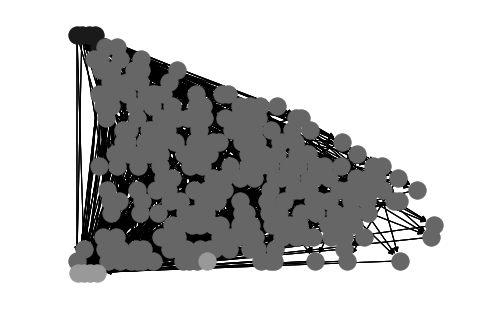

In [123]:
write_dot(g,'test.dot')
pos = graphviz_layout(g, prog='dot')
nx.draw(g, pos, 
        nodelist=inputs,
        node_color='.1',
        with_labels=False, arrows=True)
nx.draw(g, pos, 
        nodelist=hidden,
        node_color='.4',
        with_labels=False, arrows=True)
nx.draw(g, pos, 
        nodelist=outputs,
        node_color='.6',
        with_labels=False, arrows=True)
plt.savefig('nx_test.png')

In [124]:
def get_layers(g):
    g2 = nx.topological_sort(g)
    max_layer = 0
    for n in g2:
        g.node[n]['layer'] = max([g.node[k[0]]['layer'] for k in g.in_edges(n)] + [-1]) + 1
        max_layer = max(max_layer,g.node[n]['layer'])
    
    layers = [[] for _ in range(max_layer + 1)]
    
    for n in g:
        layers[g.node[n]['layer']].append(n)
    
    flat_idx = 0
    for i, layer in enumerate(layers):
        for j, n in enumerate(layer):
            g.node[n]['idx'] = j
            g.node[n]['flat_idx'] = flat_idx
            flat_idx += 1
            
    return layers

In [125]:
layers = get_layers(g)

In [126]:
def create_mask(g):
    layers = get_layers(g)
    mask = []    
    weights = []
    n_nodes = 0
    for i in range(len(layers) - 1):
        n_nodes += len(layers[i])
        mask.append(np.zeros((n_nodes,len(layers[i+1]))))
        weights.append(np.zeros((n_nodes,len(layers[i+1]))))
        for node1 in layers[i+1]:
            for node0, _ in g.in_edges(node1): 
                x = g.node[node0]['flat_idx']
                y = g.node[node1]['idx']
                mask[i][x,y] = 1
                weights[i][x,y] = g[node0][node1]['weight']
                
    return mask, weights
        
        

In [127]:
mask, weights = create_mask(g)

[print(w) for w in weights]

[[0.70631985 0.         0.05696567]
 [0.90845251 0.92348504 0.        ]
 [0.         0.04289039 0.88964838]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
[[0.         0.         0.         0.64647425 0.        ]
 [0.81592127 0.         0.30654634 0.         0.46182792]
 [0.         0.         0.13418547 0.         0.        ]
 [0.06744948 0.         0.         0.         0.45799479]
 [0.         0.12938129 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.6996586  0.087865   0.65482698 0.10581021 0.        ]
 [0.         0.         0.         0.         0.95261249]]
[[0.         0.         0.47414688 0.        ]
 [0.         0.55307964 0.00711157 0.        ]
 [0.         0.         0.         0.        ]
 [0.67134629 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.15453492]
 [0.         0.         0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]